## Different error constraints on metrics
### dataset
### algo

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json

from result_plots.QuerySketch.common.common import read_data, get_metric_mapping
from result_plots.QuerySketch.common.process_data_from_solver import get_mean_from_iterations, normalize_error_result, get_ensemble_error
from result_plots.QuerySketch.common.plot import get_result_from_pkl, get_x_position, get_xtick_position, \
                                                plot_raw, get_gain, gain_over_strawman, consolidate_gain_over_strawman

---

## Plotting functions

In [2]:
def call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name = "Test", \
                  mem_size = 131072, all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd'], isSaveFig = False):
    plot_raw(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, all_metrics, isSaveFig)
    gain_result = gain_over_strawman(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, all_metrics, isSaveFig)
    merge_gain_result = consolidate_gain_over_strawman(gain_result, name, all_metrics, isSaveFig)
    
    global global_merge_gain_all_ensemble
    for d in merge_gain_result:
        global_merge_gain_all_ensemble.append(d)

    global global_name_all_ensemble
    global_name_all_ensemble.append(name)


## Common variables

In [3]:
seeds = [1, 2, 3, 4, 5]
count = 1

flowkeys = ["dstIP,dstPort",]
epochs = ['30']
datasets = ['equinix-nyc.dirA.20180517-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20180621-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20180816-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180816-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180816-131100.UTC.anon.pcap/', ]

# datasets = ['equinix-nyc.dirA.20181018-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181018-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181018-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20181115-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181115-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181115-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20181220-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181220-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181220-131100.UTC.anon.pcap/', ]

# all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd']

isSaveFig = False
mem_size = 131072

In [4]:
## Global variables
## !!, must reset every time
global_merge_gain_all_ensemble = []
global_name_all_ensemble = []

## record ensemble error per box
global_ensemble_error = []

---

## Plot selection results

----

### metric_4_cd_ent_cardinality_fsd_bound_cd_2_run_5

In [5]:
all_metrics = ['change_det', 'entropy', 'card', 'fsd']
name = f'Metric {len(all_metrics)} - {int(mem_size/1024)} KB - '
for m in all_metrics:
    name += f"{m}, "
name = name[:-2]
name += ' - bound_cd_0.2'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [6]:

# ========== metric_4_cd_ent_cardinality_fsd_bound_cd_2_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'change_det': 14.272314349144821, 'entropy': 256.7521204910075, 'card': 19.988337463163738, 'fsd': 1.6021033046780857}


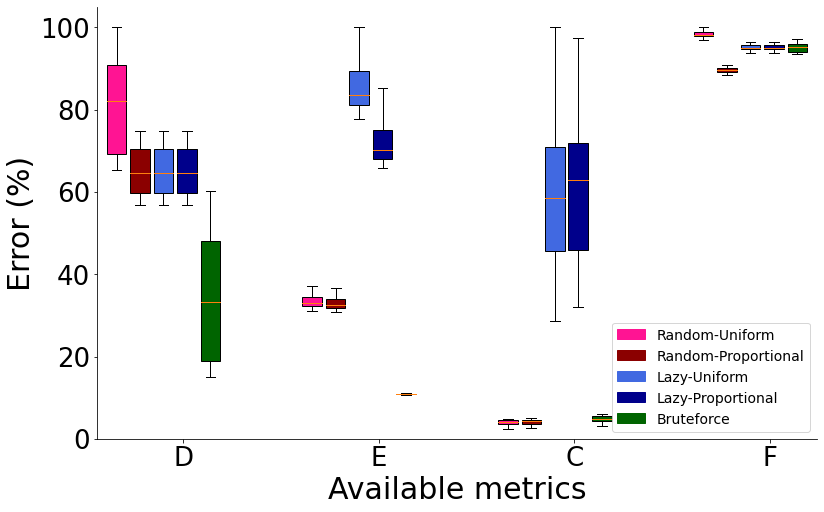

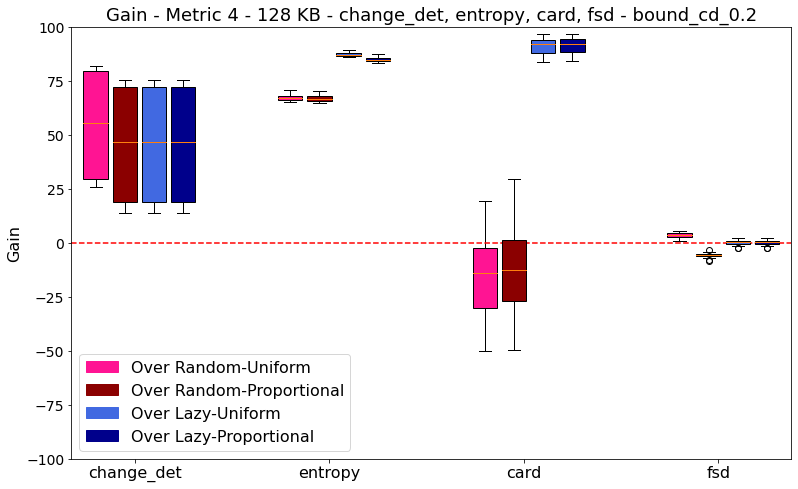

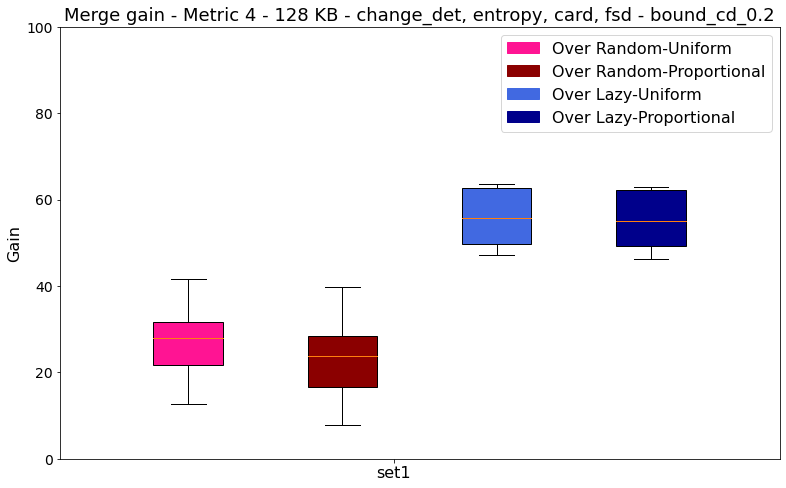

In [7]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### metric_4_cd_ent_cardinality_fsd_bound_cd_3_run_5

In [8]:
all_metrics = ['change_det', 'entropy', 'card', 'fsd']
name = f'Metric {len(all_metrics)} - {int(mem_size/1024)} KB - '
for m in all_metrics:
    name += f"{m}, "
name = name[:-2]
name += ' - bound_cd_0.3'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [9]:

# ========== metric_4_cd_ent_cardinality_fsd_bound_cd_3_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'change_det': 14.272314349144821, 'entropy': 278.4167611922473, 'card': 20.254241218573554, 'fsd': 1.6021033046780857}


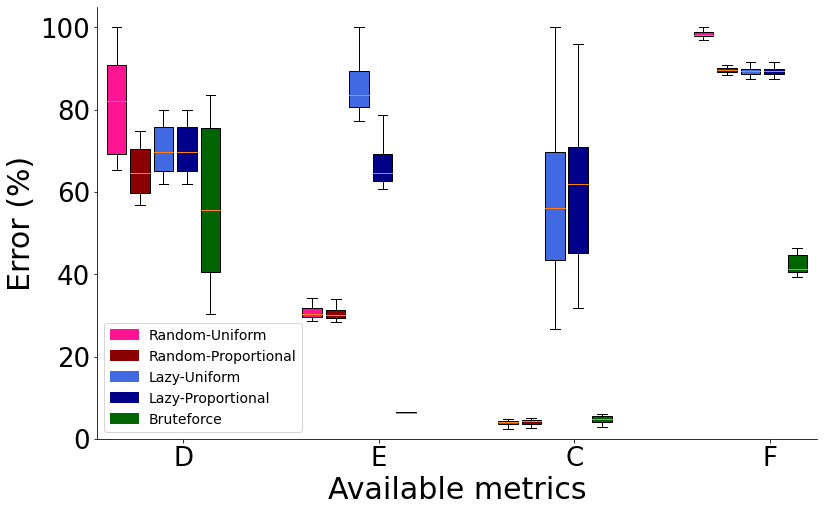

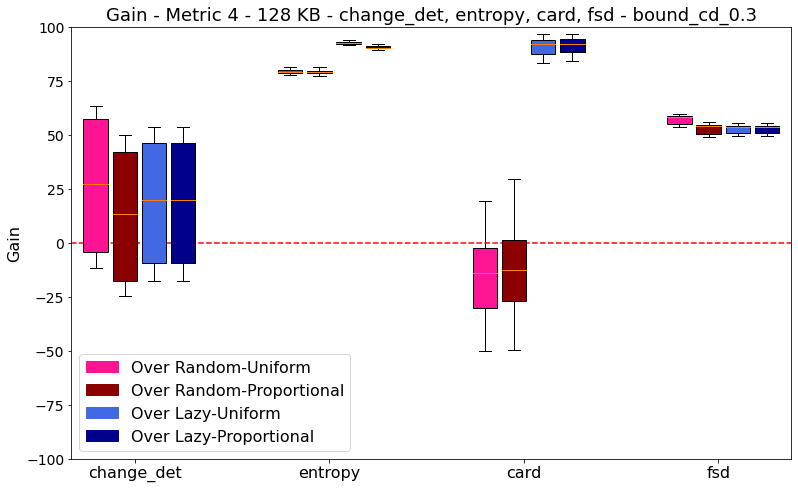

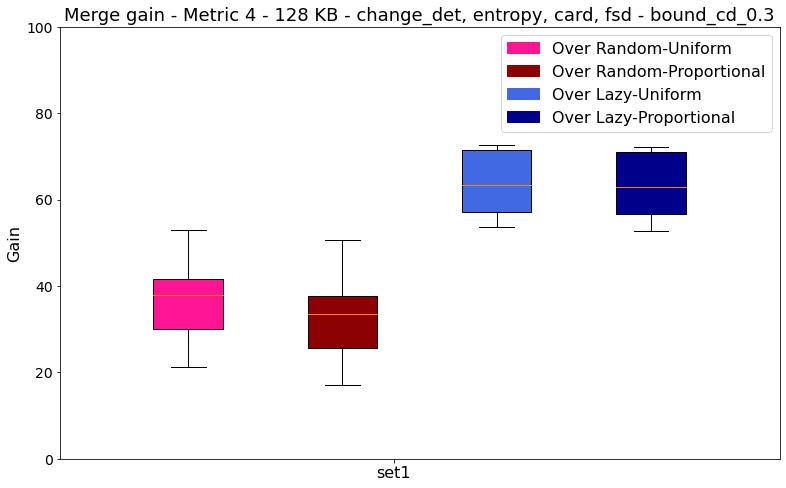

In [10]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### metric_4_hh_ent_cardinality_fsd_bound_hh_05_run_5

In [11]:
all_metrics = ['hh', 'entropy', 'card', 'fsd']
name = f'Metric {len(all_metrics)} - {int(mem_size/1024)} KB - '
for m in all_metrics:
    name += f"{m}, "
name = name[:-2]
name += ' - bound_hh_0.05'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [12]:

# ========== metric_4_hh_ent_cardinality_fsd_bound_hh_05_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', ]
algos = ['cs']
widths = [4096]
rows = [5]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'entropy', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'entropy', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 278.1997324978332, 'entropy': 218.97061678652796, 'card': 19.456529952344102, 'fsd': 1.6021033046780857}


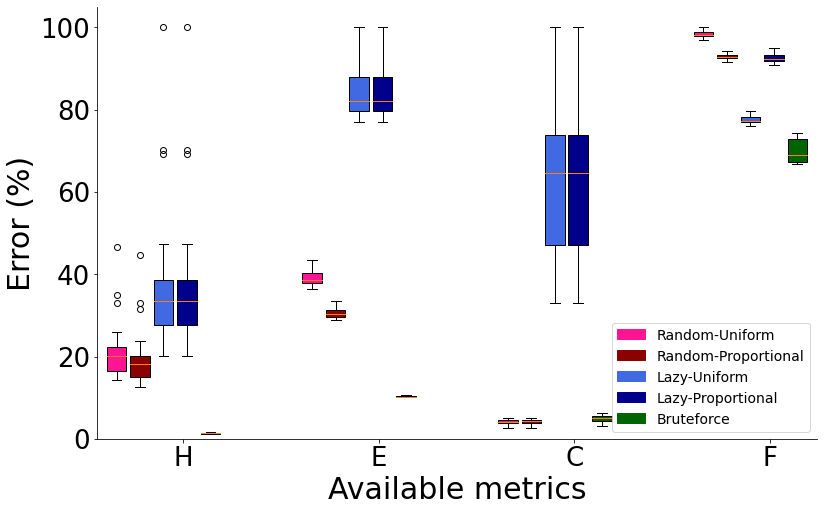

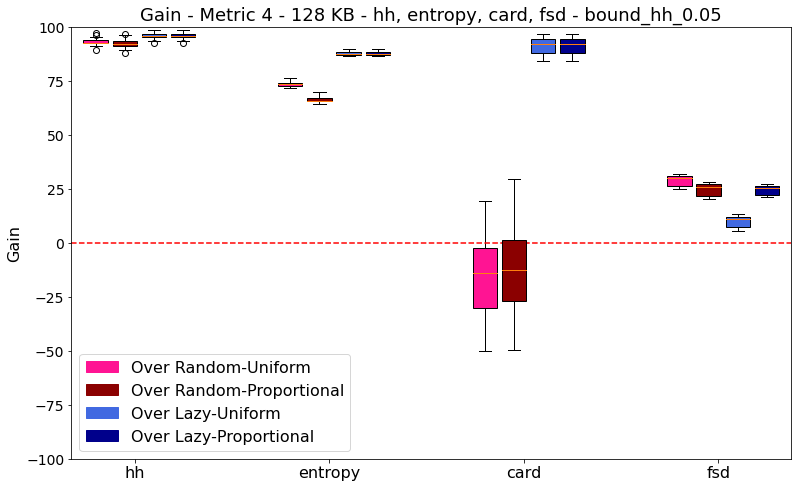

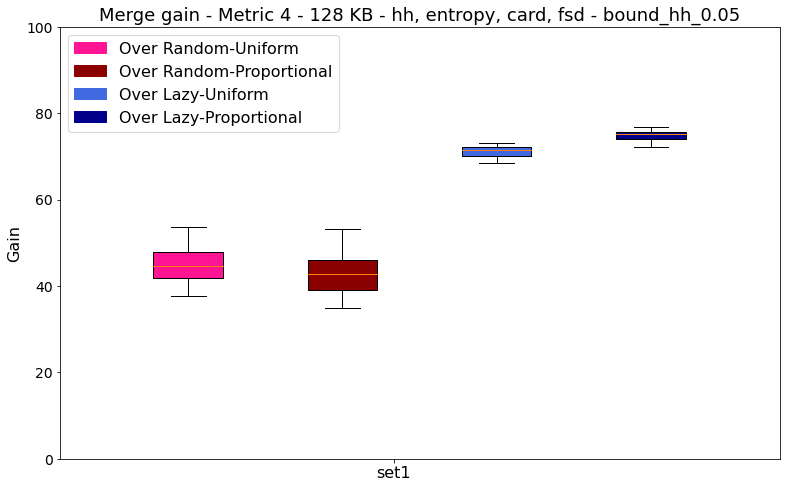

In [13]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### metric_4_hh_ent_cardinality_fsd_bound_hh_1_run_5

In [14]:
all_metrics = ['hh', 'entropy', 'card', 'fsd']
name = f'Metric {len(all_metrics)} - {int(mem_size/1024)} KB - '
for m in all_metrics:
    name += f"{m}, "
name = name[:-2]
name += ' - bound_hh_0.1'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [15]:

# ========== metric_4_hh_ent_cardinality_fsd_bound_hh_1_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'entropy', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'entropy', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 278.1997324978332, 'entropy': 218.97061678652796, 'card': 19.456529952344102, 'fsd': 1.6203393199497325}


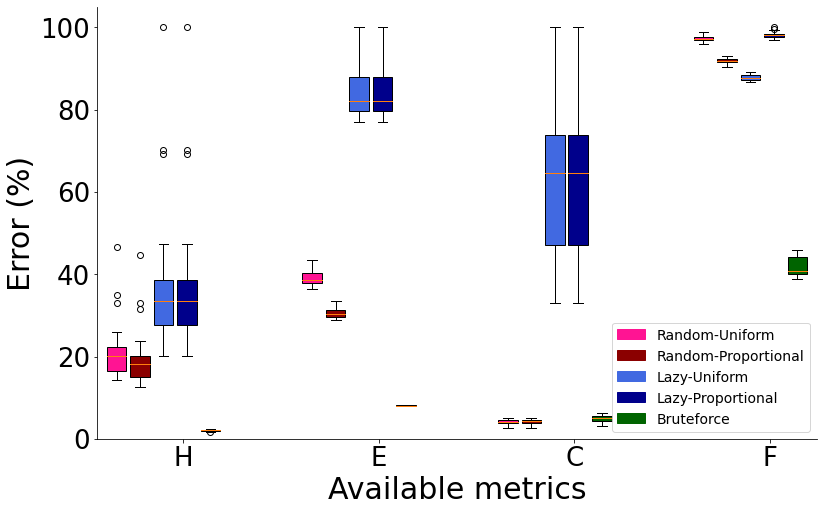

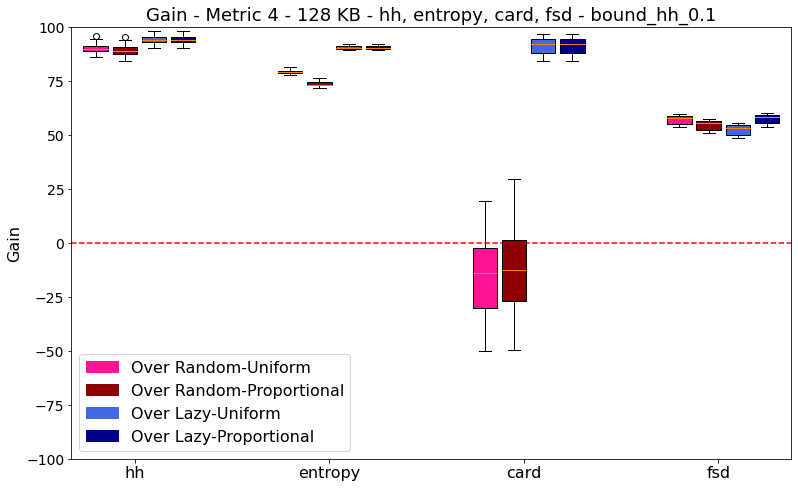

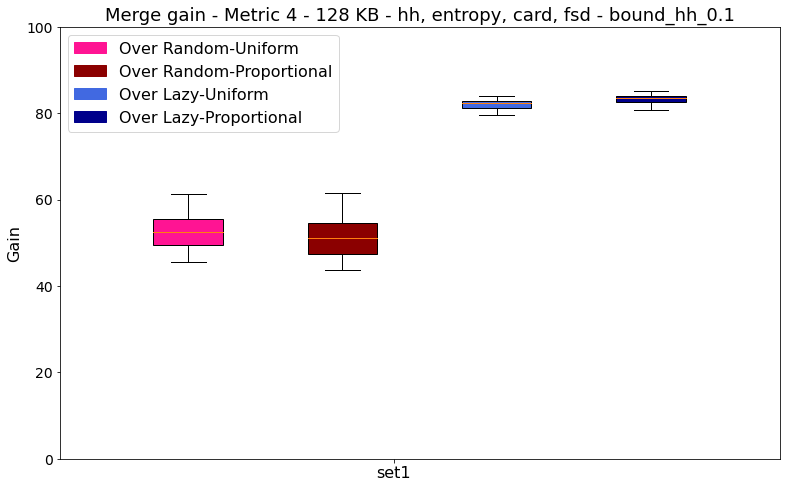

In [16]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### metric_5_hh_cd_ent_cardinality_fsd_bound_cd_2_run_5

In [17]:
all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd']
name = f'Metric {len(all_metrics)} - {int(mem_size/1024)} KB - '
for m in all_metrics:
    name += f"{m}, "
name = name[:-2]
name += ' - bound_cd_0.2'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [18]:

# ========== metric_5_hh_cd_ent_cardinality_fsd_bound_cd_2_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 307.50904274795573, 'change_det': 30.278134101309757, 'entropy': 322.05353972745525, 'card': 20.78604872939319, 'fsd': 1.7904622742600906}


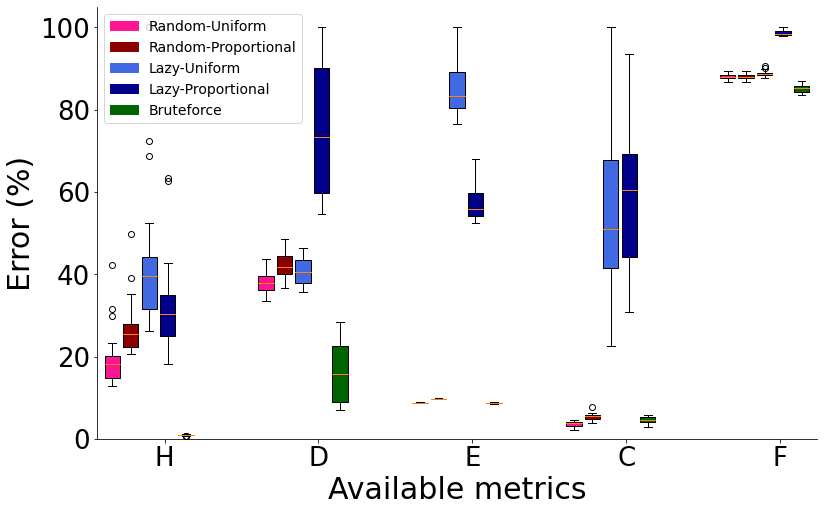

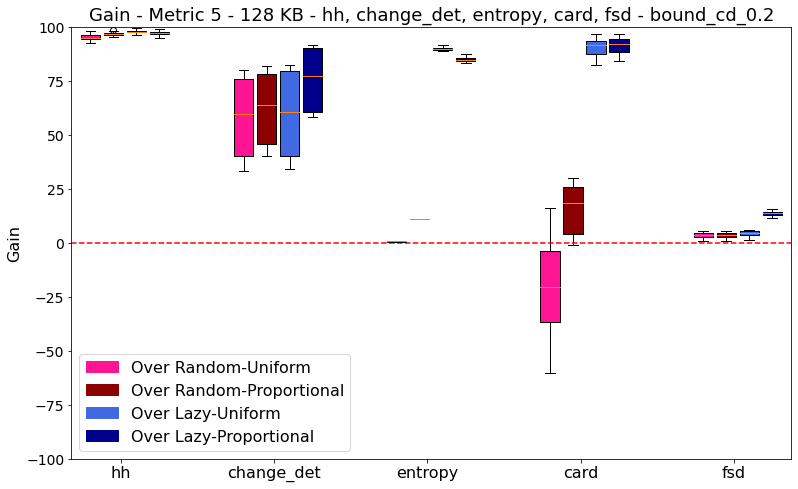

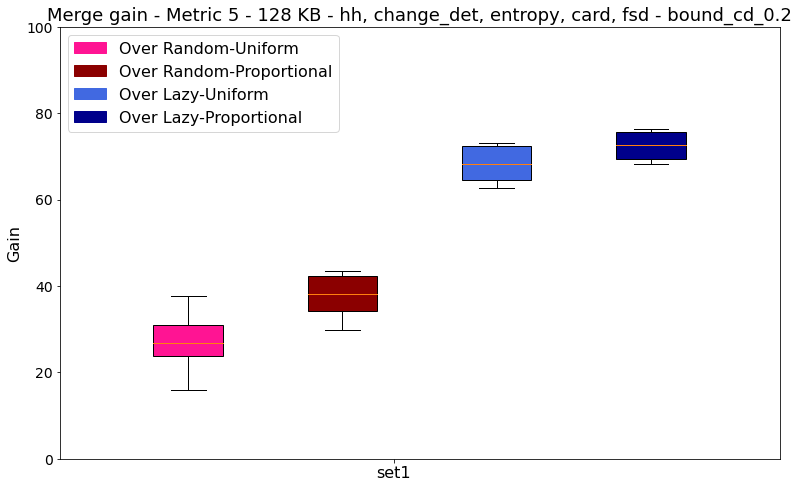

In [19]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### metric_5_hh_cd_ent_cardinality_fsd_bound_cd_3_run_5

In [20]:
all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd']
name = f'Metric {len(all_metrics)} - {int(mem_size/1024)} KB - '
for m in all_metrics:
    name += f"{m}, "
name = name[:-2]
name += ' - bound_cd_0.3'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [21]:

# ========== metric_5_hh_cd_ent_cardinality_fsd_bound_cd_3_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 301.6471806979313, 'change_det': 21.403978969729895, 'entropy': 300.2351504598513, 'card': 20.52014497398337, 'fsd': 1.7230383140716978}


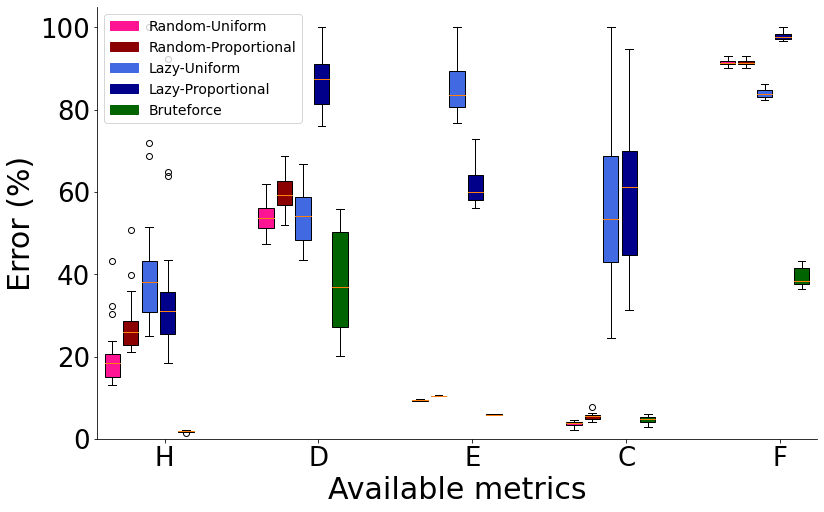

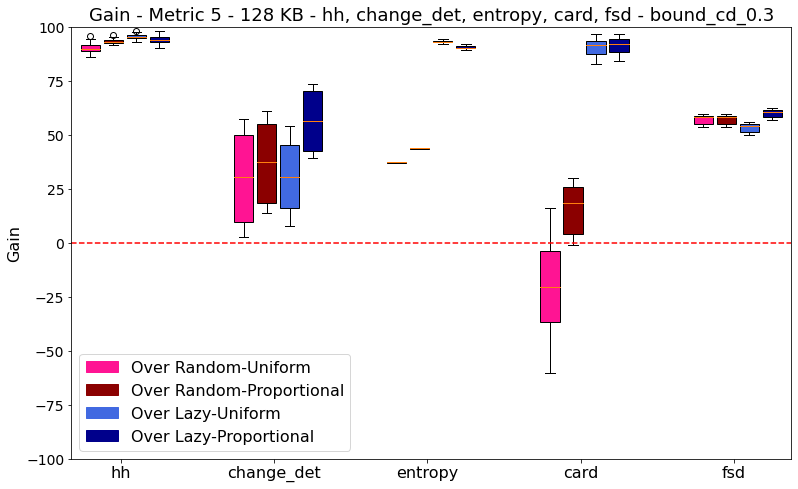

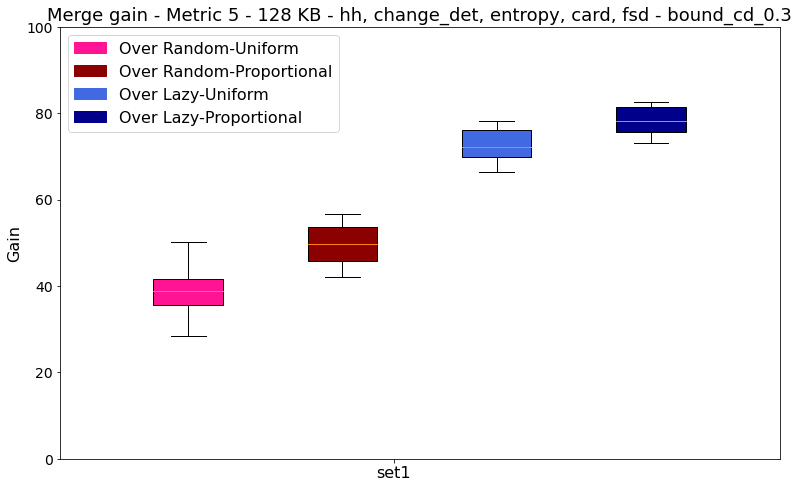

In [22]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

---

## Different error constraints (bound)

In [29]:
## Plot raw result
def boxplot_impact_memory(data, labels, name, isSaveFig = False):
    ## comparison version plot
    # box plot 
    # https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
    # Box plots with custom fill colors
    # https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

    import matplotlib.patches as mpatches

    xlabels = labels
    colors = ['deeppink', 'darkred', 'royalblue', 'darkblue']
    colors = colors * int(len(data) / 4) # 4 strawmen

    fig = plt.figure(figsize = (10, 6))
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    
    ax.set_ylim([0, 100])

    # Creating plot
    bplot = ax.boxplot(x=data, 
                       positions = get_x_position(int(len(data) / 4), 4),
                       patch_artist=True) # , showfliers=False
    # ax.set_xlim(0, 1)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    plt.axvline(x = 8, color = 'g', linestyle = '--')
    plt.axvline(x = 16, color = 'g', linestyle = '--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid()
        
    plt.ylabel("Error reduction (%)", fontsize=28)
    plt.xlabel("Available ensembles with error constraints", fontsize=28)
    plt.xticks(get_xtick_position(int(len(data) / 4), 4), xlabels, fontsize=26)
    plt.yticks(fontsize=26)

    # plt.title(f"Gain over strawman - {name}", fontsize=18)
    # textstr = 'H: Heavy Hitter    E: Entropy \nC: Cardinality       F: Flow Size Distribution \nD: Change Detection'
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0)
    # ax.text(0.24, 0.18, textstr, transform=ax.transAxes, fontsize=22,
    #     verticalalignment='top', bbox=props)

    # create legends
    legend_labels = ['over Random-Uniform', 'over Random-Proportional', 
                    'over Lazy-Uniform', 'over Lazy-Proportional']
    legend_patch = []
    legend_patch.append(mpatches.Patch(color=colors[0], label=legend_labels[0]))
    legend_patch.append(mpatches.Patch(color=colors[1], label=legend_labels[1]))
    legend_patch.append(mpatches.Patch(color=colors[2], label=legend_labels[2]))
    legend_patch.append(mpatches.Patch(color=colors[3], label=legend_labels[3]))
    plt.legend(handles=legend_patch, fontsize=22, frameon=False, ncol=2, loc=(0,0.85)) # , loc="upper right"

    # import pickle
    # with open(f'pickles/{name}.pkl', 'wb') as fout:
    #     pickle.dump(fig, fout)
    # plt.savefig('figures/impact_of_error_constraints.pdf', format='pdf', bbox_inches='tight')

    # show plot
    plt.show()

In [24]:
## get the x-label
metric_to_label = {}
metric_to_label['hh'] = 'H'
metric_to_label['entropy'] = 'E'
metric_to_label['card'] = 'C'
metric_to_label['fsd'] = 'F'
metric_to_label['change_det'] = 'D'
metric_to_label['cd'] = 'D'
metric_to_label['ent'] = 'E'

name_for_all_taskset = []

for name in global_name_all_ensemble:
    tmp = name.split('- ')[2]
    tmp = tmp.replace(' ', '').split(',')
    s = ''
    for t in tmp:
        s = s + metric_to_label[t] + '-'
    s = s [:-1]
    
    tmp = name.split('- ')[3]
    tmp = tmp
    bound = metric_to_label[tmp.split('_')[1]] + ': ' + tmp.split('_')[2]
    name_for_all_taskset.append(s + f"\n{bound}")
name_for_all_taskset

['D-E-C-F\nD: 0.2',
 'D-E-C-F\nD: 0.3',
 'H-E-C-F\nH: 0.05',
 'H-E-C-F\nH: 0.1',
 'H-D-E-C-F\nD: 0.2',
 'H-D-E-C-F\nD: 0.3']

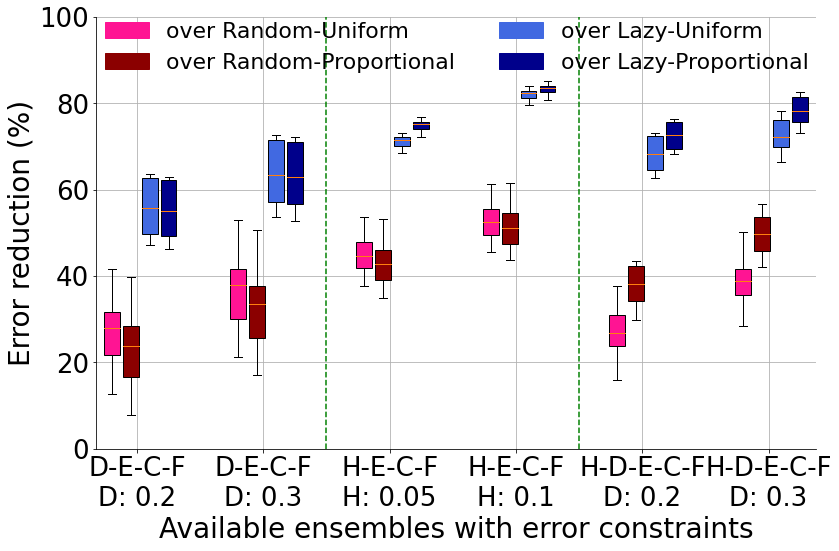

In [25]:
isSaveFig = False
boxplot_impact_memory(global_merge_gain_all_ensemble, name_for_all_taskset, "impact_of_error_constraints", isSaveFig)

### Save plot data as json

In [28]:
# Save data as json
isDumpJson = False

if isDumpJson:
    # save gain result
    ll = []
    for arr in global_merge_gain_all_ensemble:
        ll.append(arr.tolist())
    with open('results/figure_data/impact_of_error_constraints_gain.json', 'w') as out:
        json.dump(ll, out)
        
    # save ensemble error
    ll = []
    for arr in global_ensemble_error:
        ll.append(arr.tolist())
    with open('results/figure_data/impact_of_error_constraints_error.json', 'w') as out:
        json.dump(ll, out)